<a href="https://colab.research.google.com/github/rizqyjoe/Facial_Expression_Recognition_CNN_VGG16/blob/main/Model%201/3_40%25_Acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#Import Libraries
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Input,Dense
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input as pi
from keras.optimizers import Adam
from keras import optimizers

print(keras.__version__)

2.4.3


In [49]:
num_classes =7
image_resize = 48
batch_size_training = 64
batch_size_validation = 64

path_training = '/content/drive/MyDrive/Dataset/FER2013/images/train'
path_validation = '/content/drive/MyDrive/Dataset/FER2013/images/validation'

In [50]:
data_generator =ImageDataGenerator(
    preprocessing_function = pi
)

In [51]:
training_generator = data_generator.flow_from_directory(
    path_training,
    target_size = (image_resize,image_resize),
    batch_size = batch_size_training,
    class_mode='categorical')

Found 28831 images belonging to 7 classes.


In [52]:
validation_generator = data_generator.flow_from_directory(
    path_validation,
    target_size = (image_resize,image_resize),
    batch_size = batch_size_validation,
    class_mode='categorical',
)

Found 7066 images belonging to 7 classes.


In [53]:
model = Sequential()

In [54]:
model.add(VGG16(
    include_top = False,
    pooling='avg',
    weights='imagenet',
))

In [55]:
model.add(Dense(num_classes,activation='softmax'))

In [56]:
model.layers[0].layers

In [57]:
model.layers[0].trainable = False

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 3591      
Total params: 14,718,279
Trainable params: 3,591
Non-trainable params: 14,714,688
_________________________________________________________________


In [59]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [66]:
steps_per_epoch_training = len(training_generator)/batch_size_training
steps_per_epoch_validation = len(validation_generator)/batch_size_validation
num_epochs = 100

In [67]:
fit_history = model.fit(
    training_generator,
    steps_per_epoch = steps_per_epoch_training,
    epochs = num_epochs,
    validation_data=validation_generator,
    validation_steps = steps_per_epoch_validation,
    verbose=1)

Epoch 1/100
7/7 [==============================] - 41s 6s/step - loss: 2.8919 - acc: 0.3301 - val_loss: 3.5036 - val_acc: 0.2969
Epoch 2/100
7/7 [==============================] - 40s 6s/step - loss: 2.7663 - acc: 0.3125 - val_loss: 2.5675 - val_acc: 0.2812
Epoch 3/100
7/7 [==============================] - 35s 5s/step - loss: 2.8674 - acc: 0.3203 - val_loss: 2.8475 - val_acc: 0.3594
Epoch 4/100
7/7 [==============================] - 34s 5s/step - loss: 2.6321 - acc: 0.3359 - val_loss: 2.7214 - val_acc: 0.3281
Epoch 5/100
7/7 [==============================] - 35s 5s/step - loss: 2.9254 - acc: 0.3340 - val_loss: 2.9477 - val_acc: 0.3438
Epoch 6/100
7/7 [==============================] - 35s 5s/step - loss: 2.6889 - acc: 0.3633 - val_loss: 2.4288 - val_acc: 0.3203
Epoch 7/100
7/7 [==============================] - 36s 5s/step - loss: 2.6932 - acc: 0.3418 - val_loss: 2.6243 - val_acc: 0.3203
Epoch 8/100
7/7 [==============================] - 36s 5s/step - loss: 2.4986 - acc: 0.3496 - val

In [64]:
model.save('FER2013_classifier_VGG16_epoch_model.h5')

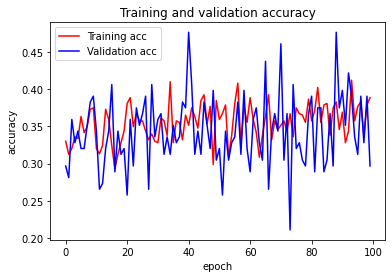

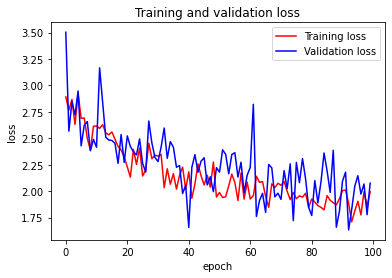

In [68]:
accuracy = fit_history.history['acc']
val_accuracy = fit_history.history['val_acc']
loss = fit_history.history['loss']
val_loss = fit_history.history['val_loss']
num_epochs = range(len(accuracy))
plt.plot(num_epochs, accuracy, 'r', label='Training acc')
plt.plot(num_epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(num_epochs, loss, 'r', label='Training loss')
plt.plot(num_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()